# Session 9: Imbalanced-Bagging-Boosting
MSA 8010: Data Programming

Agenda:
- Imbalanced Data: Problem Definition and Solutions
- Ensemble Learning: Bagging, and Boosting

Sources:
- [Learning From Imbalanced Data, Springer, 2018](https://link.springer.com/book/10.1007%2F978-3-319-98074-4)
- https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
- [Tomek Links' paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4309452)
- https://www.kaggle.com/nareshbhat/outlier-the-silent-killer
- https://en.wikipedia.org/wiki/DBSCAN
- https://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html
- https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30
- https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

### Definition
- A dataset is said to be imbalanced when there is a significant, or in some cases extreme, disproportion among the number of examples of each class of the problem.
- In other words, the class imbalance occurs when the number of examples representing one class is much lower than the ones of the other classes.
- Hence, one or more classes may be underrepresented in the dataset.

### Effects
- Imbalanced data, has significant effect on various problems.
- Some applications that are known to suffer from this problem are:
    - fault diagnosis, anomaly detection, medical diagnosis, e-mail spam, face recognition, and detection of oil spills.

### Imbalanced data in Binary Classification
- In two-class problems the minority (underrepresented) class is usually referred to as the **positive** class, whereas the majority class is considered to be the **negative** one.
- The following image show a two-class problem with ratio 1:100.
- It means that for each positive/minority class example there are 100 negative/majority class examples.

<img src="binary-example.jpg" width="70%" />

### The Problem
- One of the main issues in imbalanced problems is that usually, the underrepresented class is the class of interest of the problem from the application point of view.
- Think about examples mentioned earlier: 
    - In the `medical diagnosis`, the goal is to find a health problem (i.e., most of the subjects are healthy, but those who have a disease, are important)
    - In the `detection of oil spills`, the goal is to find spills (i.e., not many spills, but they are important).

### The Problem
- Although we are interested in `positive` classes, a standard classifier learning algorithms are usually biased toward the `negative` class.
- Rules predict those instances are weighted in favor of the accuracy metric or the corresponding cost function. 
- The minority class can be ignored (treating them as noise), because more general rules are preferred.
- __As a consequence, minority class instances are more often misclassified than those from the majority one.__

<img src="two-models.jpg" width="100%" />

### The Problem: Example
- The previous example shows two models for the same dataset and the same features.
- On the left side, Model 1 has learned that it should label every example as negative.
    - In fact, such a simple model achieves a 99.01% of accuracy.
- The right model's accuracy obtained over the test set is 98.61%, 
    - The accuracy is lower than Model 1. 
- Despite being less accurate in terms of global accuracy, this second model is able to distinguish both classes,

### Lessons Learned
1. Accuracy is no longer a proper measure in the imbalance scenario.
1. We need classifiers that are biased toward the minority class, without neglecting the accuracy over the majority class.

A large amount of techniques have been developed to overcome this issue, that we can categorize them in four groups:
1. Algorithm level (or internal) approaches
1. Data Level (or external) approaches
1. Cost-sensitive learning framework
1. Ensemble-based methods

### 1. Algorithm level (or internal) approaches

- They modify the learning process of existing classifier to accept costs.
- They bias the learning toward the minority class. 
- In order to perform the adaptation a special knowledge of both the corresponding `classifier` and `the application domain` is required.
    - to comprehend why the classifier fails when the class distribution is uneven.


### 2. Data Level (or external) approaches
- They aim at rebalancing the class distribution by resampling the data space.
- This way, the modification of the learning algorithm is avoided. 
- These methods are discussed in depth in Chap. 5 of this book:
    - [Learning From Imbalanced Data, Springer, 2018](https://link.springer.com/book/10.1007%2F978-3-319-98074-4)
    - Also, we cover some examples in this session.


### 3. Cost-sensetive learning framework
- This method falls between data and algorithm level approaches. 
- Both data level transformations (by adding costs to instances)
- And, algorithm level modifications (by modifying the learning process to accept costs)
- Chapter 4 of the mentioned book covers this approach.

### 4. Ensemble-based methods
- Usually consist of a combination between an ensemble learning algorithm and one of the techniques above.
    - We will talk about ensemble learning algorithms in this session.
    - Also, Ensemble-based models are described in Chap. 7 of the mentioned book.
- Adding a data level approach to the ensemble learning algorithm:
    - the new hybrid method usually preprocesses the data before training each classifier.
- Adding a cost-sensitive ensembles instead of modifying the classifier:
    - guides the cost minimization via the ensemble learning algorithm.

### Let's focus on the second category: Resampling
- The training instances are modified in such a way to produce a more balanced class distribution.
- This allows classifiers to perform in a similar manner to standard classification.
- Cateogies of resampling techniques:
    - Undersampling methods
    - Oversampling methods
    - Hybrids methods

### Undersampling
- Ojective: equalizing the number of examples of each class
- The major drawback of random undersampling is that this method can discard potentially useful data that could be important for the induction process.
- We discuss some undersampling techniques:
    - **Random Undersampling (RUS):** This technique randomly eliminates the majority class examples to get a balanced instance set.
    - **Near Miss Undersampling**: A method that select examples to _keep_
    - **Tomek Links**: A method that selects examples to _delete_
    - **One-Sided Selection for Undersampling**: Combinations of keep and delete methods

In [1]:
# Creating an imbalanced dataset
from sklearn.datasets import make_classification

# 10,000 examples with two input variables and a 1:100 distribution:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [2]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


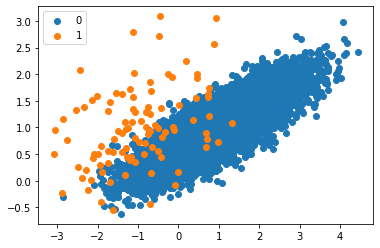

In [3]:
# scatter plot of examples by class label
import numpy as np
from matplotlib import pyplot

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Next, we can begin to review popular _undersampling_ methods made available via the `imbalanced-learn` Python library.
- `conda install -c conda-forge imbalanced-learn`

Or:
- `pip install imbalanced-learn --user`

In [4]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


**Near Miss Undersampling:** 

- A collection of methods that select examples to keep.
- It has three methods in the `imblearn` library.
- Keep majority class examples with minimum average distance to:
    1. k closest minority class examples. _(Method 1)_
    1. k furthest minority class examples. _(Method 2)_
    1. Look for the k closest majority class examples for each minority class example. _(Method 3)_
        - This method balances the data differently than the rest.

In [5]:
### Near Miss Undersampling, Method 1
from imblearn.under_sampling import NearMiss
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


Scatter plot of examples by class label (Method 1)


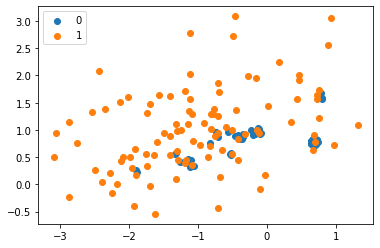

In [6]:
print("Scatter plot of examples by class label (Method 1)")

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [7]:
### Near Miss Undersampling, Method 2
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

undersample = NearMiss(version=2, n_neighbors=3)

X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


- NearMiss-2 strategy, which is an inverse to NearMiss-1. 
- It selects examples that are closest to the most distant examples from the minority class, 
    - defined by the `n_neighbors` argument.

Scatter plot of examples by class label (Method 2)


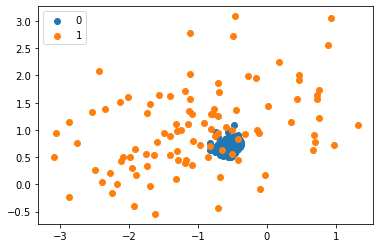

In [8]:
print("Scatter plot of examples by class label (Method 2)")
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

- NearMiss-3 that selects the closest examples from the majority class for each minority class.
- It selects examples that are closest to the most distant examples from the minority class, 
    - The `n_neighbors_ver3` argument determines the number of examples to select for each minority example
    - Although the desired balancing ratio set via `sampling_strategy` will filter this so that the desired balance is achieved.

In [9]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


Scatter plot of examples by class label (Method 3)


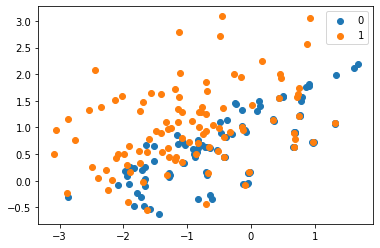

In [10]:
print("Scatter plot of examples by class label (Method 3)")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**Tomek Link Undersampling:** 

- It is a method that select examples to _delete_ from the majority class.
- Instances `a` and `b` define a Tomek Link if: 
    1. Instance `a`’s nearest neighbor is `b`, and
    2. Instance `b`’s nearest neighbor is `a`, and
    3. Instances `a` and `b` belong to different classes.

In [11]:
# Undersample and plot imbalanced dataset with Tomek Links (delete)
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
new_X, new_y = undersample.fit_resample(X, y)
removed = np.delete(X, undersample.sample_indices_, axis=0)
# summarize the new class distribution
counter = Counter(new_y)

print(counter)
print("Only 26 examples from the majority class were removed.")

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})
Only 26 examples from the majority class were removed.


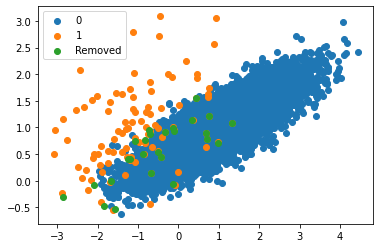

In [12]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(new_y == label)[0]
    pyplot.scatter(new_X[row_ix, 0], new_X[row_ix, 1], label=str(label))
    
pyplot.scatter(removed[:, 0], removed[:, 1], label="Removed")
pyplot.legend()
pyplot.show()

**Tomek Links Removal: Conclusion** 

- The goal is to find and remove positive instances when they are very similar with a negative instance.
- Although finding the ambiguous examples on the class boundary is useful, alone, it is not sufficient.
- In practice, the Tomek Links procedure is often combined with other methods.

### Random Undersampling
- Random undersampling is the simplest technique involves removing random records from the majority class.
- It is a naive technique, because it has no assumption about data.
- It can cause loss of information, but in some use cases it is useful.
    - For example, if the positive class and negative class are equal in nature, but we have more samples of one class.

### Undersampling
- Ojective: equalizing the number of examples of each class
- The major drawback of random undersampling is that this method can discard potentially useful data that could be important for the induction process.
- We discuss some undersampling techniques:
    - **Random Undersampling (RUS):** This technique randomly eliminates the majority class examples to get a balanced instance set.
    - **Near Miss Undersampling**: A method that select examples to _keep_
    - **Tomek Links**: A method that selects examples to _delete_
    - **One-Sided Selection for Undersampling**: Combinations of keep and delete methods

In [13]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
counter = Counter(y)
print(counter)
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X, y = undersample.fit_resample(X, y)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


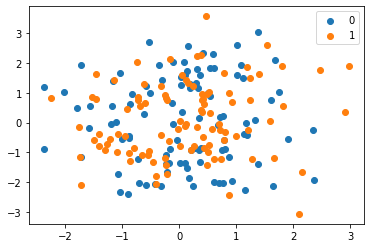

Results may vary given the stochastic nature of the algorithm.


In [14]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
print("Results may vary given the stochastic nature of the algorithm.")

### Oversampling

- Oversampling is the replication of minority class examples. 
- Three common algorithms for oversampling are `SMOTE`, and `ADASYN`, and their variants:
    - `Random Oversampling (ROS)`: This technique randomly duplicates samples from the majority class to get a balanced instance set.
    - `SMOTE`: Synthetic Minority Oversampling Technique (SMOTE). 
        - This technique is described in the next slide.
    - `ADASYN`: the Adaptive Synthetic (ADASYN). 
        - Similar to SMOTE, but after creating samples, it adds a random small values to the points thus making it more realistic.

### Random Oversampling
- Random oversampling is the simplest technique involves duplicating random records from the minority class.
- It is a naive technique, because it has no assumption about data.
- Oversampling using ROS can cause overfit issues and hurt the generalization of your model.

In [15]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
counter = Counter(y)
print(counter)
# define undersample strategy
undersample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = undersample.fit_resample(X, y)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


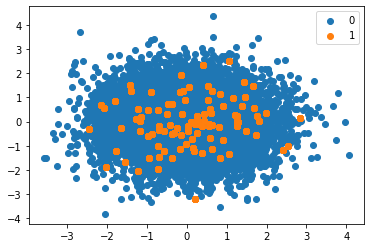

Results may vary given the stochastic nature of the algorithm.


In [16]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
print("Results may vary given the stochastic nature of the algorithm.")

### Oversampling: How SMOTE works?

- Both `SMOTE`, and `ADASYN` use the same algorithm to generate new samples.
- Considering a sample $x_i$, a new sample $x_{new}$ will be generated considering its `k_neighbors`
- For instance, the 3 nearest-neighbors are included in the blue circle as illustrated in the figure below.
- Then, one of these nearest-neighbors $x_{zi}$ is selected and a sample is generated as follows:
    - $x_{new} = x_i + \lambda \times (x_{zi} - x_i)$, where $\lambda$ is a random number in the range `[0, 1]`. 


<img src="sphx_glr_plot_illustration_generation_sample_001.png" width="50%" />

### Oversampling in `imblearn`

- In the `imblearn` library, the following classes perform oversampling:
    - `RandomOverSampler`: Naive random over-sampling
    - `SMOTE`: Synthetic Minority Oversampling Technique (SMOTE) 
    - `ADASYN`: the Adaptive Synthetic (ADASYN)

### Combining Oversampling and Undersampling

- We can use the `Pipeline` class to create a combined sequence of resampling methods:

`pipeline = Pipeline(steps=[('o', over), ('u', under)])`
- This pipeline first applies an oversampling technique to a dataset.
- Then applies undersampling to the output of the oversampling transform.
- A model can be added as the last step in the pipeline.
    - This allows the pipeline to be treated as a model.

### A pipeline example


In [17]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define model
model = DecisionTreeClassifier()
# define resampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])

### Combining Random Oversampling and Undersampling (Manual)

In [18]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model on the pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))
print(f"Fully unbalanced score: {mean(cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)):0.3f}")
print('NOTE: `Cross_validate` only returns scores, to create a model you can use the `GridSearchCV` class.')

Mean ROC AUC: 0.801
Fully unbalanced score: 0.773
NOTE: `Cross_validate` only returns scores, to create a model you can use the `GridSearchCV` class.


In [19]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

print('Original:', len(y[y==0]), len(y[y==1]))
over_X, over_y = over.fit_resample(X, y)
print('Over:', len(over_y[over_y==0]), len(over_y[over_y==1]))
under_X, under_y = under.fit_resample(over_X, over_y)
print('Under:', len(under_y[under_y==0]), len(under_y[under_y==1]))

Original: 9900 100
Over: 9900 990
Under: 1980 990


### Combining SMOTE Oversampling and Tomek Links Undersampling
- `imblearn` has some classes for combining techniques, for example: `SMOTETomek`

In [20]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

model = DecisionTreeClassifier()
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
pipeline = Pipeline(steps=[('r', resample), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.812


### Outliers

- **Noise**: a random error or variance in a variable. Consequently, the variables affected by the noise will have values that fall outside the expected values for those variables. 
- **Outliers**: If these extreme values are out of range, we call them outliers. Based on their nature, we should fix them differently.
    - If an outlier is due to human errors in data collection, we should remove them. 
        - Examples:
            - an individual can appear with age over 1,000 years.
            - an individual can appear with a negative salary.
    - We can look at some undersampling techniques, as methods to remove outliers.
- There are different methods to deal with outliers. For example:
    - Z-Score method, IQR method, DBSCAN

### Z-Score
Using Z score method, we can find out how many standard deviations value away from the mean.$\newline$      
      $z=\dfrac{x-\bar{x}}{\sigma}$ 

### Example
<img src="zscore1.jpg" width="80%"/>


    

In the previous example:$\newline$
    - `68%` of the data points lie between `+1` and `-1` standard deviation.$\newline$
    - `95%` of the data points lie between `+2` and `-2` standard deviation.$\newline$
    - `99.7%` of the data points lie between `+3` and `-3` standard deviation.

In [21]:
#generating 50 random numbers between 0, and 100
sample_data = np.random.randint(100, size=50)
sample_data

array([71, 21, 35, 57, 57, 52, 16, 76, 99, 40, 63, 51, 36, 82, 45,  8, 49,
       88, 98, 14, 93, 17, 69, 74, 91, 76, 53, 70, 64, 42, 92,  2, 15, 65,
       64, 30, 19, 59, 21, 24, 78, 58, 67, 62, 31, 81, 95, 51, 95,  1])

In [22]:
#adding some unrelated numbers:
sample_data = np.append(sample_data, np.array([880,2000,590]))
sample_data

array([  71,   21,   35,   57,   57,   52,   16,   76,   99,   40,   63,
         51,   36,   82,   45,    8,   49,   88,   98,   14,   93,   17,
         69,   74,   91,   76,   53,   70,   64,   42,   92,    2,   15,
         65,   64,   30,   19,   59,   21,   24,   78,   58,   67,   62,
         31,   81,   95,   51,   95,    1,  880, 2000,  590])

In [23]:
def Zscore_outlier(data):
    out = []
    m = np.mean(data)
    sd = np.std(data)
    for i in data: 
        z = (i-m)/sd
        if np.abs(z) > 1: 
            out.append(i)
    return out

outliers = Zscore_outlier(sample_data)
print("Outliers:", outliers)

Outliers: [880, 2000, 590]


### IQR (Inter Quartile Range)

- In this method by using IQR, we detect outliers.
- IQR tells us the variation in the data set.
- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers.

<img src="iqr.png" />

- `Q1` represents the `1st quartile`/25th percentile of the data.
- `Q2` represents the `2nd quartile`/50th percentile of the data. (median)
- `Q3` represents the 3`rd quartile`/75th percentile of the data.
- `IQR` = `q3`-`q1`
- `(Q1–1.5*IQR)` represents the smallest value in the data set. 
- `(Q3+1.5*IQR)` represnts the largest value in the data set.

In [24]:
sample_data

array([  71,   21,   35,   57,   57,   52,   16,   76,   99,   40,   63,
         51,   36,   82,   45,    8,   49,   88,   98,   14,   93,   17,
         69,   74,   91,   76,   53,   70,   64,   42,   92,    2,   15,
         65,   64,   30,   19,   59,   21,   24,   78,   58,   67,   62,
         31,   81,   95,   51,   95,    1,  880, 2000,  590])

In [25]:
out=[]
def iqr_outliers(data):
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3-q1
    print("iqr",iqr)
    lt = q1 - 1.5 * iqr
    ut = q3 + 1.5 * iqr
    print("Upper tail",ut)
    print("Lower tail",lt)
    for i in data:
        if i > ut or i < lt:
            out.append(i)
    print("Outliers:", out)
iqr_outliers(sample_data)

iqr 43.0
Upper tail 142.5
Lower tail -29.5
Outliers: [880, 2000, 590]


### DBSCAN (Density-based spatial clustering of applications with noise)

- DBSCAN a clustering algorithm.
- It finds core samples in a dense area and groups neighbors to create clusters.
- The samples in a low-density area become the outliers.
- The main inputs are `epsilon`, and `minimum samples`:
    - `eps`: a distance parameter that defines the radius to search for nearby neighbors.
    - `min_samples`: minimum amount of points required to form a cluster.

<img src="dbscan.png" />

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [26]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
#Let's use only two features
df = df[["sepal length (cm)", "sepal width (cm)"]]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Outlier values detected in purple color.


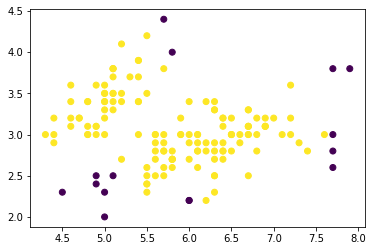

In [28]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

model = DBSCAN(eps=0.4, min_samples=10).fit(df)
colors = model.labels_
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=colors)
print("Outlier values detected in purple color.")

In [29]:
# outliers dataframe
outliers = df[model.labels_ == -1]
outliers

,sepal length (cm),sepal width (cm)
14,5.8,4.0
15,5.7,4.4
41,4.5,2.3
57,4.9,2.4
60,5.0,2.0
62,6.0,2.2
93,5.0,2.3
98,5.1,2.5
106,4.9,2.5
117,7.7,3.8


### Ensamble Learning

- Ensemble Learning helps improve machine learning results by combining several models to improve predictive performance compared to a single model.
- The main motivation behind ensemble learning is to correctly combine weak models to get a more accurate and robust model
<img src="ensemble.png" />

### Ensamble Learning: methods

Two popular methods for combining the predictions from different models are:

- `Bagging`: Building multiple models (typically of the same type) from different subsamples of the training dataset.
- `Boosting`: Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

#### Ensamble Learning: Bagging

- Since multiple model predictions are averaged together to form the final predictions, Bagging reduces variance and helps to avoid overfitting.
- Although it is usually applied to decision tree methods, it can be used with any type of method.
- In case of regression problem we take mean of the output and in case of classification we take the majority vote.
- Bagging is more helpful if we have overfitting (high variance) base models.
- Bagging uses bootstraps, that's why we also call it bootstraping.

#### Bootstraping
- The bootstrap method is a resampling technique.
- `Bagging` training models with bootstraps of a dataset, then aggregating the models.
<img src="bootstrap_concept.png" />


#### Ensamble Learning: Boosting

- The main idea of boosting is to add additional models to the overall ensemble model sequentially.
- In Bagging, we averaged each individual model created. 
- However, in Boosting, with each iteration, a new model is created and the new base-learner model is trained (updated) from the errors of the previous learners.
-  Machine learning models are used one after the other and the predictions made by first layer models are used as input to next layer models. 
- Boosting needs you to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it.
- There are different techniques for boosting, such as: `AdaBoost`, and `Gradient Boosting`

#### AdaBoost (Adaptive Boosting)
- AdaBoost is a specific Boosting algorithm developed for classification problems (also called discrete AdaBoost). 
- In each iteration, AdaBoost identifies miss-classified data points, increasing their weights (and decrease the weights of correct points, in a sense) so that the next classifier will pay extra attention to get them right.
- The following figure illustrates how weights impact the performance of a simple decision stump(tree with depth 1)

<img src="adaboost.png" width="60%" />

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

iris = datasets.load_iris()
X,y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
# n_estimators: The maximum number of estimators at which boosting is terminated. 

ada_boost = AdaBoostClassifier(random_state=1, n_estimators=10)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test,y_test)

0.9666666666666667

#### Gradient Boosting (GBM)
- Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction.
- It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.
- Instead of adjusting weights of data points, Gradient boosting focuses on the difference between the prediction and the ground truth.
- Works for both regression and classification problems. 

#### XGBoost (eXtreme Gradient Boosting)
- `XGBoost` is an optimized distributed gradient boosting library with better speed and performance compared to other algorithms.
- `XGBoost` provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.
- It is a complicated algorithm, that uses Machine Learning on itself. If interested, here is a video of its creator, _Tianqi Chen_: 
    - https://youtu.be/Vly8xGnNiWs
- Fortunately, `sklearn` supports `xgboost` models though it is a separate library.

<img src="xgboost-features.png" />

<img src="xgboost-compare.jpg" />

### So should we use just XGBoost all the time?
- As Data Scientists, we must test all possible algorithms for data at hand to identify the champion algorithm.
- Besides, picking the right algorithm is not enough. We must also choose the right configuration of the algorithm for a dataset.
- Furthermore, there are several other considerations for choosing the winning algorithm such as computational complexity, explainability, and ease of implementation. 

#### Installing

`conda install -c conda-forge xgboost`

Or, `pip install xgboost`

Learn about paramters:
https://xgboost.readthedocs.io/en/latest/parameter.html

In [32]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster='gbtree',subsample='0.5', random_state=1)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.9418352162998144